In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# Load the e-commerce customer dataset from a CSV file
customers_data = pd.read_csv("shop_smart_ecommerce.csv")

# Display the first five rows to verify successful loading and inspect structure
customers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [67]:
# Display a concise summary of the DataFrame, including:
# - column names
# - non-null counts
# - data types
# - memory usage
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# EDA - Exploratory Data Analysis

In [68]:
# Filter customers who made a purchase (Revenue == True)
customers_purchasing = customers_data[customer_data["Revenue"] == True]

# Filter customers who did NOT make a purchase (Revenue == False)
customers_not_purchasing = customers_data[customer_data["Revenue"] == False]


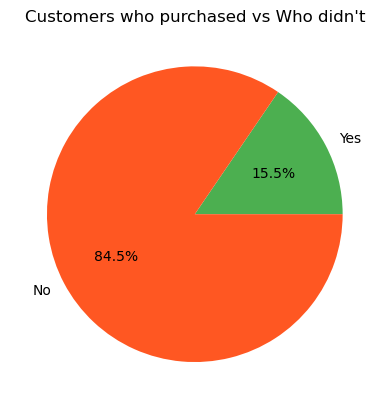

In [69]:
# Count customers who made a purchase (True) and those who did not (False)
purchase_counts = customer_data["Revenue"].value_counts()

# Reindex to ensure both True (purchased) and False (not purchased) are included,
# even if one category has 0 counts. This avoids errors in plotting.
purchase_counts = purchase_counts.reindex([True, False], fill_value=0)

# Plot a pie chart showing the distribution of purchases
# - labels: "Yes" for purchased, "No" for not purchased
# - autopct="%1.1f%%": display percentages on each slice
# - colors: green for purchases, red-orange for non-purchases
plt.pie(
    purchase_counts, 
    labels=["Yes", "No"], 
    autopct="%1.1f%%", 
    colors=['#4CAF50', '#FF5722']
)

# Add a descriptive title to the chart
plt.title("Customers who purchased vs Who didn't")

# Display the pie chart
plt.show()

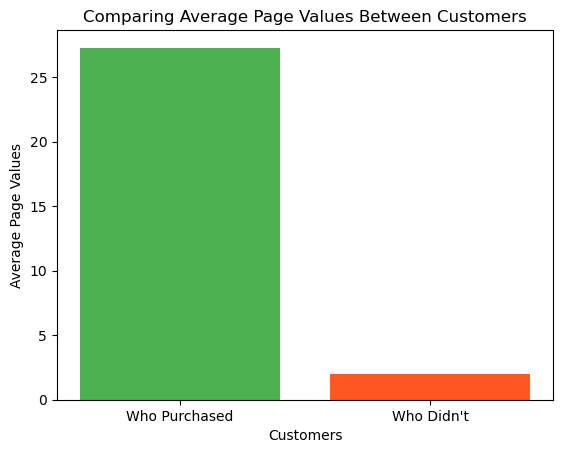

In [70]:
# Calculate the average 'PageValues' for customers who purchased vs those who didn't
# - customers_purchasing and customers_not_purchasing were defined earlier
avg_page_visited = {
    "Who Purchased": customers_purchasing["PageValues"].mean(),   # Mean page value for buyers
    "Who Didn't": customers_not_purchasing["PageValues"].mean()   # Mean page value for non-buyers
}

# Plot a bar chart to compare average page values between the two customer groups
# - colors: green for purchasers, red-orange for non-purchasers
plt.bar(avg_page_visited.keys(), avg_page_visited.values(), color=['#4CAF50', '#FF5722'])

# Label the x-axis as "Customers"
plt.xlabel("Customers")

# Label the y-axis as "Average Page Values"
plt.ylabel("Average Page Values")

# Add a descriptive title
plt.title("Comparing Average Page Values Between Customers")

# Display the bar chart
plt.show()

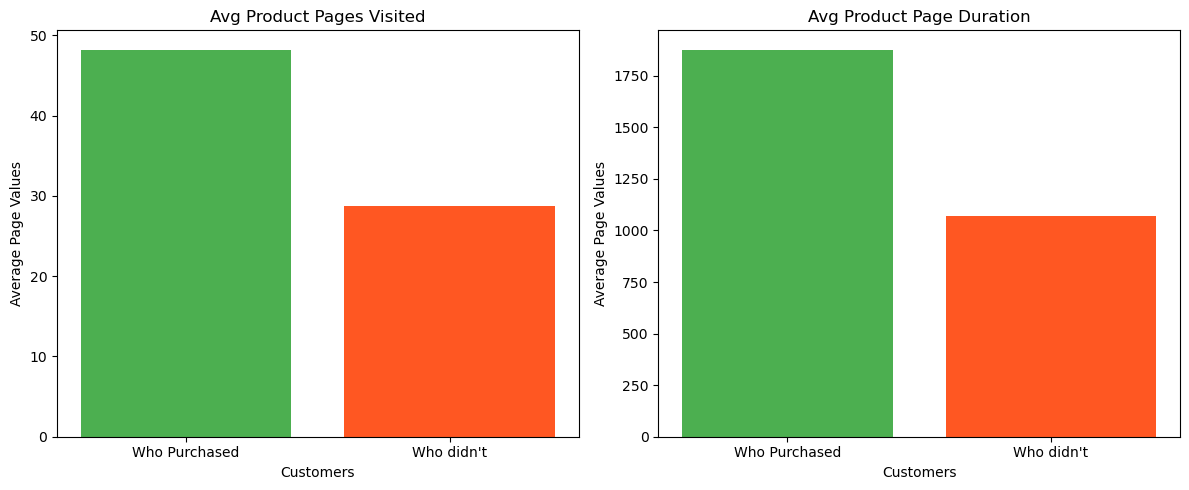

In [71]:
# Prepare data for comparison between customers who purchased and those who didn't
# - avg_product_related_pages: average number of product-related pages visited
# - avg_product_duration: average time spent on product-related pages
avg_product_related_pages = {
    "Who Purchased": customers_purchasing["ProductRelated"].mean(),        # Avg product pages for purchasers
    "Who didn't": customers_not_purchasing["ProductRelated"].mean()        # Avg product pages for non-purchasers
}

avg_product_duration = {
    "Who Purchased": customers_purchasing["ProductRelated_Duration"].mean(),  # Avg product page duration for purchasers
    "Who didn't": customers_not_purchasing["ProductRelated_Duration"].mean()  # Avg product page duration for non-purchasers
}

# Create a figure with 1 row and 2 columns of subplots to compare metrics side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Average number of product-related pages visited
axes[0].bar(
    avg_product_related_pages.keys(),
    avg_product_related_pages.values(),
    color=['#4CAF50', '#FF5722']
)
axes[0].set_title("Avg Product Pages Visited")
axes[0].set_xlabel("Customers")
axes[0].set_ylabel("Average Page Values")

# Second subplot: Average duration spent on product-related pages
axes[1].bar(
    avg_product_duration.keys(),
    avg_product_duration.values(),
    color=['#4CAF50', '#FF5722']
)
axes[1].set_title("Avg Product Page Duration")
axes[1].set_xlabel("Customers")
axes[1].set_ylabel("Average Page Values")

# Adjust layout to prevent overlapping elements and improve readability
plt.tight_layout()

# Display the combined visualization
plt.show()

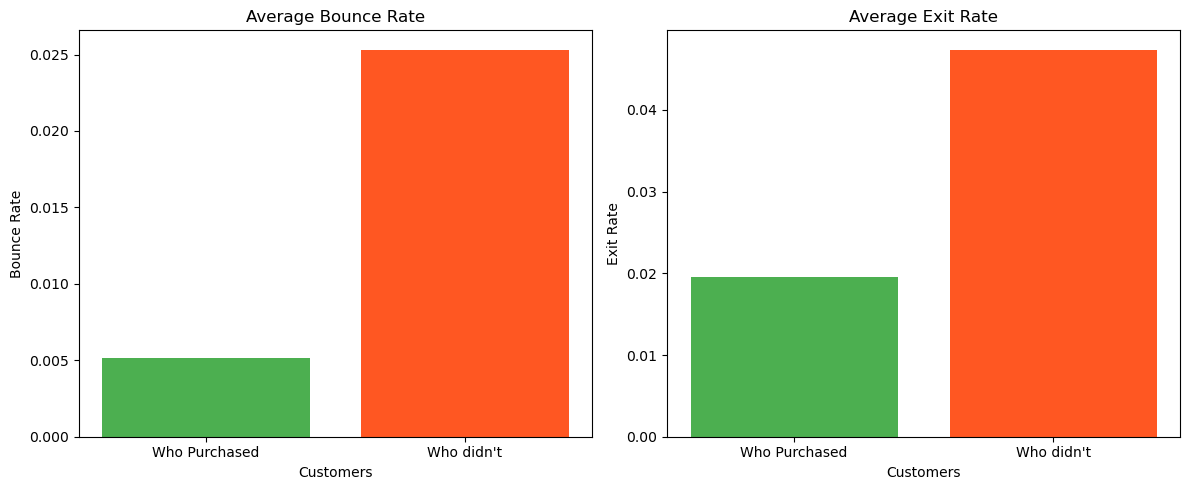

In [72]:
# Prepare data for comparing engagement and abandonment behavior
# - avg_bounce_rates: average bounce rate for purchasers vs non-purchasers
# - avg_exit_rates: average exit rate for purchasers vs non-purchasers
avg_bounce_rates = {
    "Who Purchased": customers_purchasing["BounceRates"].mean(),   # Avg bounce rate for purchasers
    "Who didn't": customers_not_purchasing["BounceRates"].mean()   # Avg bounce rate for non-purchasers
}

avg_exit_rates = {
    "Who Purchased": customers_purchasing["ExitRates"].mean(),     # Avg exit rate for purchasers
    "Who didn't": customers_not_purchasing["ExitRates"].mean()     # Avg exit rate for non-purchasers
}

# Create a figure with 1 row and 2 columns of subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Average bounce rate comparison
axes[0].bar(
    avg_bounce_rates.keys(),
    avg_bounce_rates.values(),
    color=['#4CAF50', '#FF5722']
)
axes[0].set_title("Average Bounce Rate")
axes[0].set_xlabel("Customers")
axes[0].set_ylabel("Bounce Rate")

# Second subplot: Average exit rate comparison
axes[1].bar(
    avg_exit_rates.keys(),
    avg_exit_rates.values(),
    color=['#4CAF50', '#FF5722']
)
axes[1].set_title("Average Exit Rate")
axes[1].set_xlabel("Customers")
axes[1].set_ylabel("Exit Rate")

# Adjust layout to avoid overlap and improve readability
plt.tight_layout()

# Display the combined visualization
plt.show()

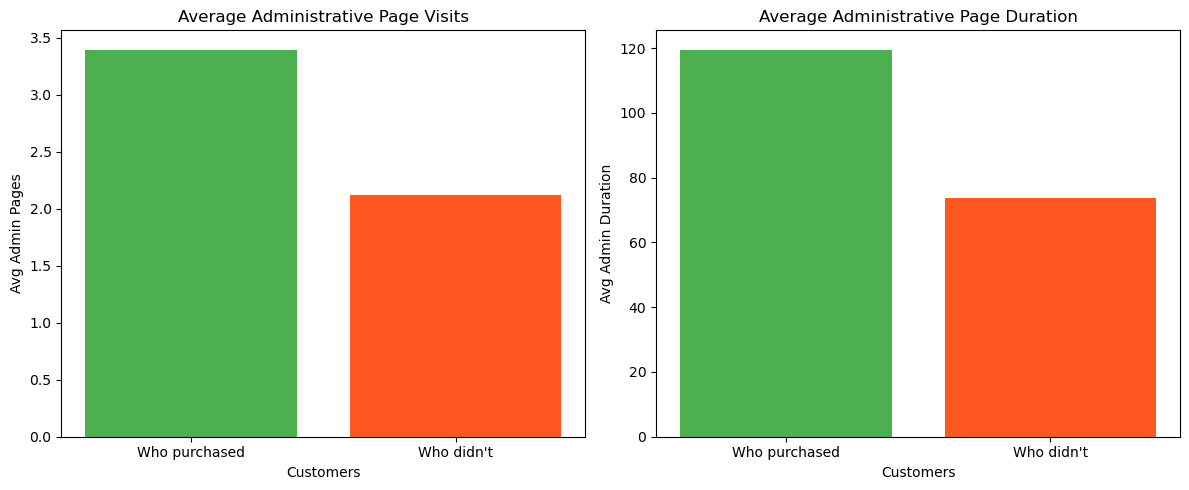

In [73]:
# Prepare data for comparing administrative page activity between customer groups
# - avg_admin_pages: average number of administrative pages visited
# - avg_admin_duration: average time spent on administrative pages
avg_admin_pages = {
    "Who purchased": customers_purchasing["Administrative"].mean(),        # Avg admin pages for purchasers
    "Who didn't": customers_not_purchasing["Administrative"].mean()        # Avg admin pages for non-purchasers
}

avg_admin_duration = {
    "Who purchased": customers_purchasing["Administrative_Duration"].mean(),  # Avg admin page duration for purchasers
    "Who didn't": customers_not_purchasing["Administrative_Duration"].mean()  # Avg admin page duration for non-purchasers
}

# Create a figure with 1 row and 2 columns of subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Average number of administrative pages visited
axes[0].bar(
    avg_admin_pages.keys(),
    avg_admin_pages.values(),
    color=['#4CAF50', '#FF5722']
)
axes[0].set_title("Average Administrative Page Visits")
axes[0].set_xlabel("Customers")
axes[0].set_ylabel("Avg Admin Pages")

# Second subplot: Average duration spent on administrative pages
axes[1].bar(
    avg_admin_duration.keys(),
    avg_admin_duration.values(),
    color=['#4CAF50', '#FF5722']
)
axes[1].set_title("Average Administrative Page Duration")
axes[1].set_xlabel("Customers")
axes[1].set_ylabel("Avg Admin Duration")

# Adjust layout to avoid overlap and improve readability
plt.tight_layout()

# Display the combined visualization
plt.show()

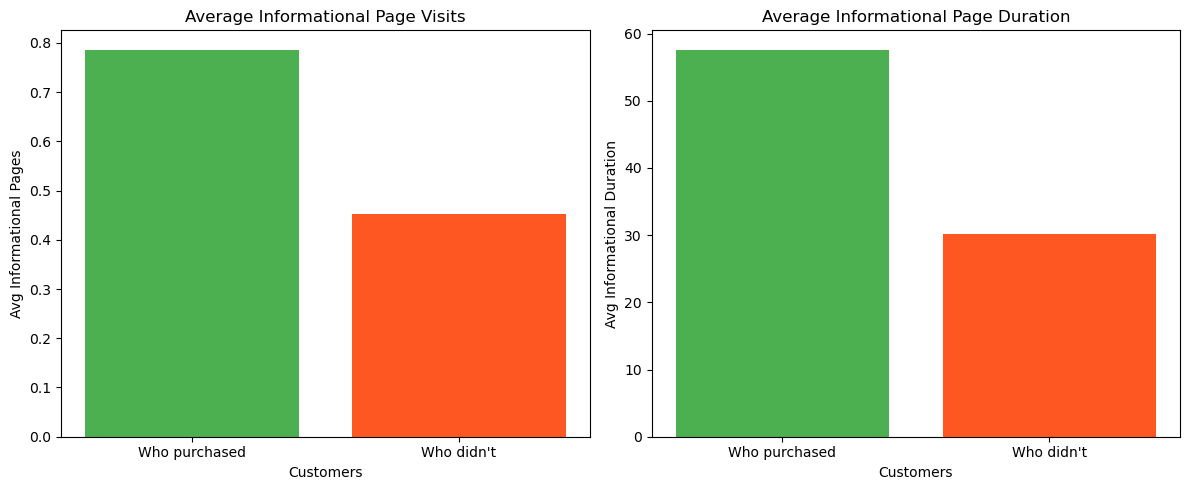

In [74]:

# Prepare data for comparing informational page activity between customer groups
# - avg_informational_pages: average number of informational pages visited
# - avg_informational_duration: average time spent on informational pages
avg_informational_pages = {
    "Who purchased": customers_purchasing["Informational"].mean(),        # Avg informational pages for purchasers
    "Who didn't": customers_not_purchasing["Informational"].mean()        # Avg informational pages for non-purchasers
}

avg_informational_duration = {
    "Who purchased": customers_purchasing["Informational_Duration"].mean(),  # Avg informational page duration for purchasers
    "Who didn't": customers_not_purchasing["Informational_Duration"].mean()  # Avg informational page duration for non-purchasers
}

# Create a figure with 1 row and 2 columns of subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Average number of informational pages visited
axes[0].bar(
    avg_informational_pages.keys(),
    avg_informational_pages.values(),
    color=['#4CAF50', '#FF5722']
)
axes[0].set_title("Average Informational Page Visits")
axes[0].set_xlabel("Customers")
axes[0].set_ylabel("Avg Informational Pages")

# Second subplot: Average duration spent on informational pages
axes[1].bar(
    avg_informational_duration.keys(),
    avg_informational_duration.values(),
    color=['#4CAF50', '#FF5722']
)
axes[1].set_title("Average Informational Page Duration")
axes[1].set_xlabel("Customers")
axes[1].set_ylabel("Avg Informational Duration")

# Adjust layout to avoid overlap and improve readability
plt.tight_layout()

# Display the combined visualization
plt.show()

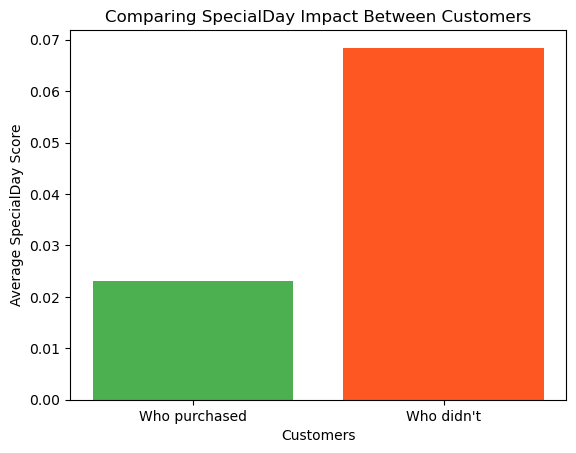

In [75]:
# Calculate the average SpecialDay score for each customer group
# - SpecialDay represents the closeness of the visit date to a special day (e.g., holiday or event)
# - "Who purchased": customers who completed a purchase
# - "Who didn't": customers who did not complete a purchase
avg_special_day = {
    "Who purchased": customers_purchasing["SpecialDay"].mean(),   # Avg SpecialDay score for purchasers
    "Who didn't": customers_not_purchasing["SpecialDay"].mean()   # Avg SpecialDay score for non-purchasers
}

# Plot a bar chart to compare average SpecialDay scores between the two groups
# - colors: green for purchasers, red-orange for non-purchasers
plt.bar(avg_special_day.keys(), avg_special_day.values(), color=['#4CAF50', '#FF5722'])

# Label the x-axis to represent customer groups
plt.xlabel("Customers")

# Label the y-axis to represent the average SpecialDay score
plt.ylabel("Average SpecialDay Score")

# Add a descriptive title to the chart
plt.title("Comparing SpecialDay Impact Between Customers")

# Display the bar chart
plt.show()

# Feature Preprocessing 

In [76]:
# Prepare features and target variable for modeling

# X contains all independent variables (features) by dropping the target column "Revenue"
X = customer_data.drop("Revenue", axis=1)

# Y contains the target variable (dependent variable)
# Convert boolean values of "Revenue" to integer (0 for False, 1 for True)
Y = customer_data["Revenue"].astype(int)

In [77]:
# Identify numerical and categorical features for preprocessing

# num_features: all columns with numeric data types (int64 or float64)
num_features = X.select_dtypes(include=["int64", "float64"]).columns

# cat_features: all columns with categorical data types (object or category)
cat_features = X.select_dtypes(include=["object", "category"]).columns

In [78]:
# Split the dataset into training and testing sets for model evaluation
# - X_train, Y_train: used to train the model
# - X_test, Y_test: used to evaluate the model's performance
# - test_size=0.2: 20% of the data is reserved for testing
# - random_state=42: ensures reproducibility of the split
# - stratify=Y: maintains the same proportion of classes (Revenue) in both train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Pipelines for Preprocssing and Model 

In [79]:
# Create a preprocessing pipeline for the dataset
# - ColumnTransformer applies different preprocessing to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # Standardize numerical features to have mean=0 and std=1
        ("num", StandardScaler(), num_features),
        
        # One-hot encode categorical features; ignore unknown categories during transformation
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [80]:
# Initialize a Decision Tree classifier with specific hyperparameters
# - max_depth=6: limits the depth of the tree to prevent overfitting
# - min_samples_leaf=30: ensures each leaf has at least 30 samples to avoid overly specific rules
# - class_weight="balanced": automatically adjusts weights to handle class imbalance
# - random_state=42: ensures reproducibility of results
DT_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=30,
    class_weight="balanced",
    random_state=42
)

In [81]:
# Create a machine learning pipeline combining preprocessing and the model
# - "preprocess": applies the ColumnTransformer to scale numeric features and encode categorical features
# - "model": fits the Decision Tree classifier on the preprocessed data
pipe = Pipeline(
    steps=[
        ("preprocess", preprocessor),  # Preprocessing step for numeric and categorical features
        ("model", DT_model)             # Decision Tree classifier
    ]
)

# Training the model

In [82]:
# Train the pipeline on the training data
# - X_train: features for training
# - Y_train: target labels for training
# The pipeline automatically applies preprocessing before fitting the Decision Tree model
pipe.fit(X_train, Y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Month', 'VisitorType'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        min_samples_leaf=30,
                                        random_state=42))])

# Prediction and Evaluation

In [83]:
# Predict the target labels for the test set using the trained pipeline
Y_pred = pipe.predict(X_test)

# Evaluate the model performance using common classification metrics

# Accuracy: overall proportion of correctly classified samples
print("Accuracy Score:", accuracy_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positives correctly identified (sensitive to false negatives)
print("Recall Score:", recall_score(Y_test, Y_pred) * 100, "%")

# Precision: proportion of predicted positives that are actually positive (sensitive to false positives)
print("Precision Score:", precision_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall, balances both metrics
print("F1 Score:", f1_score(Y_test, Y_pred) * 100, "%")

Accuracy Score: 84.71208434712084 %
Recall Score: 83.24607329842932 %
Precision Score: 50.396196513470684 %
F1 Score: 62.783810463968415 %


# Hyperparameter Tuning

In [84]:
# Define the hyperparameter grid for tuning the Decision Tree within the pipeline
# - "model__max_depth": different maximum depths of the tree to control overfitting
# - "model__min_samples_leaf": minimum samples required in a leaf node to avoid overly specific rules
param_grid = {
    "model__max_depth": [2, 4, 6, 8, 10, 12],
    "model__min_samples_leaf": [10, 20, 30, 40, 50, 60]
}

# Initialize GridSearchCV to find the best hyperparameters
# - estimator: the pipeline combining preprocessing and the Decision Tree
# - scoring="f1": optimizes the model for the F1-score, balancing precision and recall
# - cv=5: 5-fold cross-validation to ensure robust evaluation
# - n_jobs=-1: use all CPU cores for parallel processing
grid = GridSearchCV(
    pipe,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV on the training data to find the best hyperparameters
grid.fit(X_train, Y_train)

# Output the best F1 score achieved during cross-validation
print("Best F1 Score:", grid.best_score_ * 100, "%")

# Output the combination of hyperparameters that achieved the best F1 score
print("Best Params:", grid.best_params_)

Best F1 Score: 66.66738277119931 %
Best Params: {'model__max_depth': 2, 'model__min_samples_leaf': 10}
